In [1]:
#importing the needed packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
filename="whatsapp.txt"

# Reading the whatsapp chat text file
chats = pd.read_csv(filename,header=None,error_bad_lines=False,encoding='utf8')

b'Skipping line 15: expected 2 fields, saw 6\nSkipping line 19: expected 2 fields, saw 3\nSkipping line 46: expected 2 fields, saw 3\nSkipping line 54: expected 2 fields, saw 6\nSkipping line 55: expected 2 fields, saw 3\nSkipping line 63: expected 2 fields, saw 3\nSkipping line 65: expected 2 fields, saw 3\nSkipping line 83: expected 2 fields, saw 3\nSkipping line 87: expected 2 fields, saw 3\nSkipping line 102: expected 2 fields, saw 3\nSkipping line 117: expected 2 fields, saw 3\nSkipping line 119: expected 2 fields, saw 3\nSkipping line 146: expected 2 fields, saw 4\nSkipping line 166: expected 2 fields, saw 3\nSkipping line 171: expected 2 fields, saw 3\nSkipping line 190: expected 2 fields, saw 4\nSkipping line 201: expected 2 fields, saw 3\nSkipping line 207: expected 2 fields, saw 3\nSkipping line 252: expected 2 fields, saw 5\nSkipping line 262: expected 2 fields, saw 3\nSkipping line 264: expected 2 fields, saw 3\nSkipping line 281: expected 2 fields, saw 3\nSkipping line 415

In [2]:
# dropping the first 3 columns which are the encryption and notification messages
chats.drop([0,1,2],inplace=True)
chats.columns = ['Date','time and message']

In [4]:
# Eliminating the NaN entries and splitting the required column
chats.dropna(inplace=True)
messages = chats['time and message'].str.split('-',n=1,expand=True)
chats['Message'] = messages[1]
chats['Time'] = messages[0]


details = chats['Message'].str.split(':',n=1,expand = True)
chats['Name'] = details[0]
chats['Message'] = details[1]

chats.drop('time and message', axis = 1, inplace=True)

chats = chats[['Date','Time','Name','Message']]


In [6]:

chats = chats.replace(to_replace='None', value=np.nan).dropna()


chats = chats.replace(to_replace=[' +234 701 095 0358',' +234 903 836 8530',' +234 902 590 5787', ' \u200eReserve DSC',
                                  ' +234 905 635 7349',' +234 706 749 2346'], 
                      value=['Joshibk','Bolu','Ifedayo', 'Reserve', 'Faaizah', 'Lekan'])

chats = chats[~chats['Name'].str.contains(' +234 906 639 9274')]

chats[chats['Name'] == ' +234 906 639 9274']
chats.drop([943,5459],inplace=True)


chats.reset_index(drop=True,inplace=True)

In [8]:
# The participant that sent message the most
chats['Name'].value_counts().head(1)

# It happens that success DSC is the one who sent the most message with over 
# 1500 chats in total

 Success DSC    1525
Name: Name, dtype: int64

In [10]:
# Finding the participant with the most message for each month

# Grouping based on month
chats['Months'] = chats['Date'].str.split('/', expand=True)[1]
chats = chats[['Date','Months','Time','Name','Message']]

by_month = chats.groupby(['Months','Name'])


by_month = by_month.count()

In [13]:
'''After grouping based on months, the chat file starts from August 
and ends september, I concluded that Ire has the highest number of sent messages
 throughout the month of August with 103 messages in total, while Success DSC
has the highest number of messages sent in september with 1452 messages in total'''
by_month.sort_values('Message', ascending=False)

Date  Time  Message
Months Name                             
09      Success DSC  1452  1452     1452
        khok-maw'🚀    966   966      966
        Ire           601   601      601
        RehobothEEE   336   336      336
       Reserve        332   332      332
        Lateef DSC    267   267      267
       Faaizah        200   200      200
       Ifedayo        119   119      119
        Sir Fuad      112   112      112
        Avogrado      105   105      105
08      Ire           103   103      103
       Joshibk         89    89       89
09     Joshibk         86    86       86
08      Success DSC    73    73       73
        Lateef DSC     63    63       63
09      Mosope DSC     55    55       55
08      khok-maw'🚀     40    40       40
09     Lekan           36    36       36
08     Bolu            34    34       34
09      Nifemi DSC     30    30       30
08      Avogrado       25    25       25
09      Engr Dee       23    23       23
08     Ifedayo         22    22       22
09      Triumph DSC    19    19       19
08      RehobothEEE    18    18       18
09     Bolu            17    17       17
08      Triumph DSC    16    16       16
        Nifemi DSC     16    16       16
       Reserve          9     9        9
       Faaizah          9     9        9
        Engr Dee        5     5        5
       Lekan            4     4        4
        Sir Fuad        2     2        2
        Mosope DSC      1     1        1

In [15]:
# The first 10 rows of the dataframe
chats.head(10)

,Date,Months,Time,Name,Message
0,26/08/2020,08,8:52 pm,Engr Dee,Okay guys
1,26/08/2020,08,9:28 pm,Nifemi DSC,Ok
2,26/08/2020,08,9:30 pm,RehobothEEE,Yes sir
3,26/08/2020,08,11:37 pm,Mosope DSC,@mo_sopefoluwa
4,27/08/2020,08,12:46 am,Joshibk,Please I need help urgently 🙏...how do I go a...
5,27/08/2020,08,12:47 am,khok-maw'🚀,pip --upgrade pip or so
6,27/08/2020,08,12:48 am,khok-maw'🚀,pip install --upgrade pip
7,27/08/2020,08,12:51 am,Joshibk,That my pip is already in 20.2.2
8,27/08/2020,08,12:53 am,khok-maw'🚀,<Media omitted>
9,27/08/2020,08,12:55 am,Joshibk,Bro I'm also confused too...even google self ...


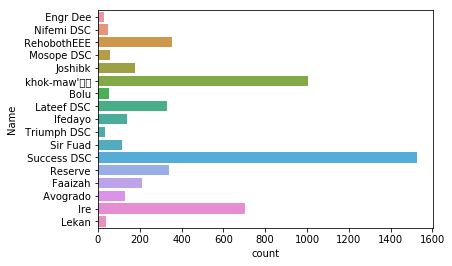

In [18]:
# Visualizing the total messages sent by each participant using seaborn countplot

sb.countplot(y=chats['Name'], data=chats)